In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.metrics import pairwise_distances

In [2]:
try:
    df = pd.read_csv("breast_cancer_clean.csv")
except FileNotFoundError:
    df = pd.read_csv("breast_cancer.csv")

In [3]:
# Drop id if present
if 'id' in df.columns:
    df = df.drop(columns=['id'])

In [4]:
# Split features/target
X = df.drop(columns=['diagnosis']).copy()
y = df['diagnosis'].copy()  # 'M' / 'B'

In [5]:
# --- Scale features (ALWAYS scale before KPCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# --- (Good default) RBF kernel with gamma via "median heuristic"
# Compute median pairwise squared distance, then gamma = 1/(2*sigma^2)
D2 = pairwise_distances(X_scaled, metric='sqeuclidean')
sigma2 = np.median(D2[D2>0])   # ignore zeros on the diagonal
gamma = 1.0/(2.0*sigma2)


print(f"Gamma (median heuristic): {gamma:.6f}")

Gamma (median heuristic): 0.012276


In [9]:
# --- Fit Kernel PCA to 2 components for visualization
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_scaled)

In [11]:
# --- "Explained variance" approximation from eigenvalues (lambdas_)
# (Not the same as linear PCA's ratio, but still a useful share-of-variance proxy)
lambdas = kpca.eigenvalues_
ratio = lambdas / lambdas.sum()
print("Eigenvalues (first 10):", lambdas[:10])
print("Approx explained-ratio (first 10):", ratio[:10])
print("Approx cumulative ratio (2 comps):", ratio[:2].sum())

Eigenvalues (first 10): [69.61522702 29.01430975]
Approx explained-ratio (first 10): [0.70582535 0.29417465]
Approx cumulative ratio (2 comps): 1.0


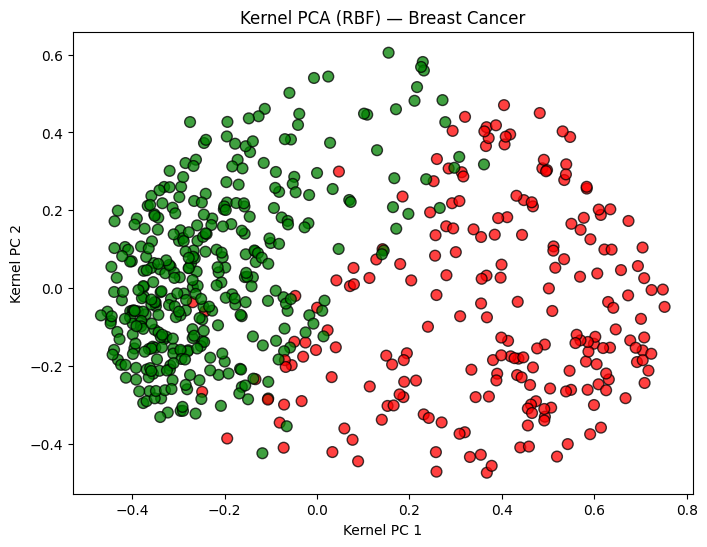

In [12]:
# --- 2D scatter of KPCA embeddings
colors = {'M':'red', 'B':'green'}
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y.map(colors), s=60, alpha=0.75, edgecolor='k')
plt.xlabel("Kernel PC 1")
plt.ylabel("Kernel PC 2")
plt.title("Kernel PCA (RBF) — Breast Cancer")
plt.show()